First 5 None Covid Files:  ['/home/CT_NonCOVID/Non-Covid (137).png', '/home/CT_NonCOVID/Non-Covid (72).png', '/home/CT_NonCOVID/Non-Covid (270).png', '/home/CT_NonCOVID/Non-Covid (55).png', '/home/CT_NonCOVID/Non-Covid (149).png']
Total Count:  399
First 5 Covid Files:  ['/home/CT_COVID/Covid (51).png', '/home/CT_COVID/Covid (8).png', '/home/CT_COVID/Covid (370).png', '/home/CT_COVID/Covid (112).png', '/home/CT_COVID/Covid (372).png']
Total Count:  400


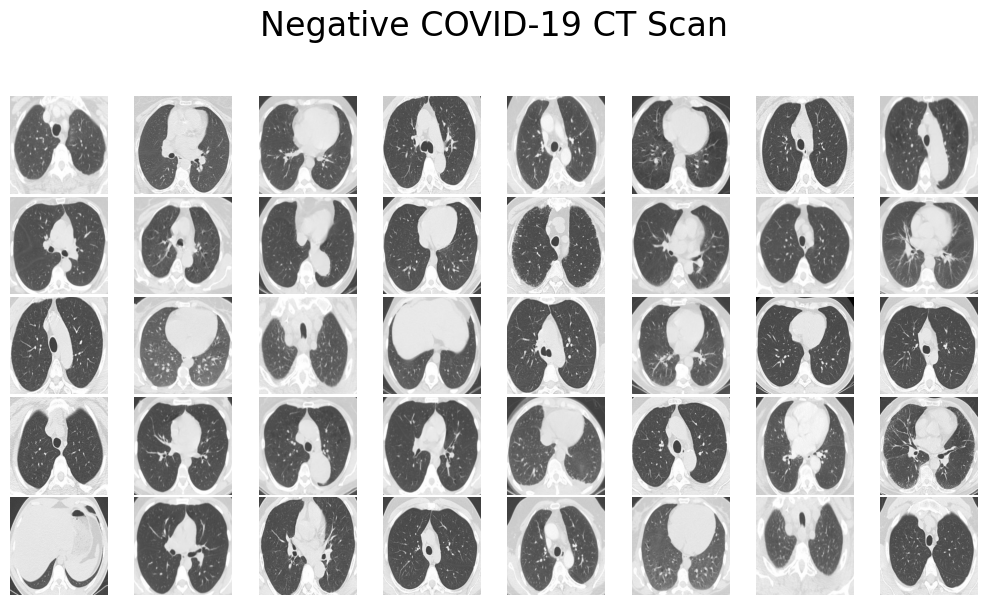

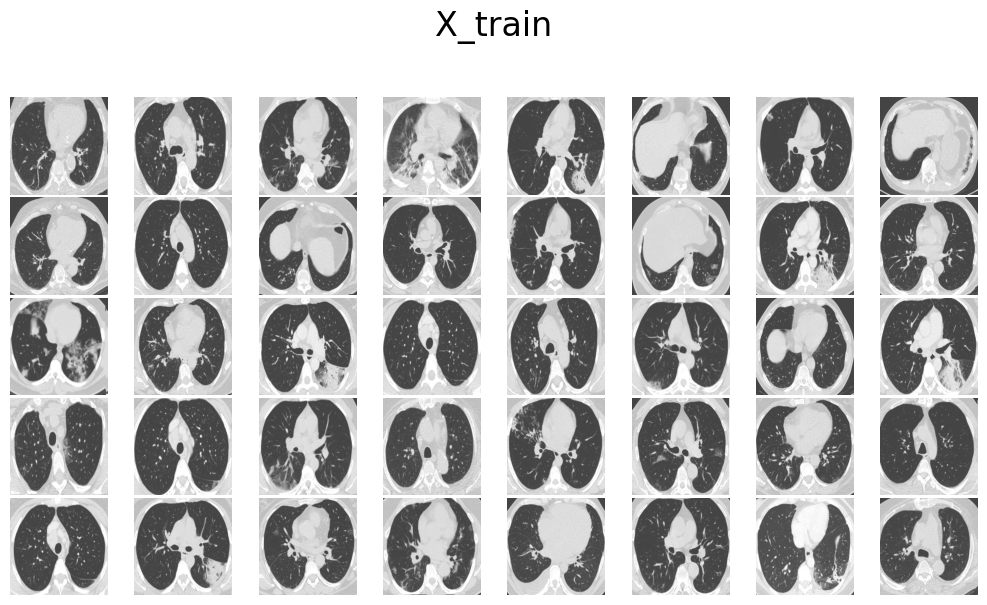

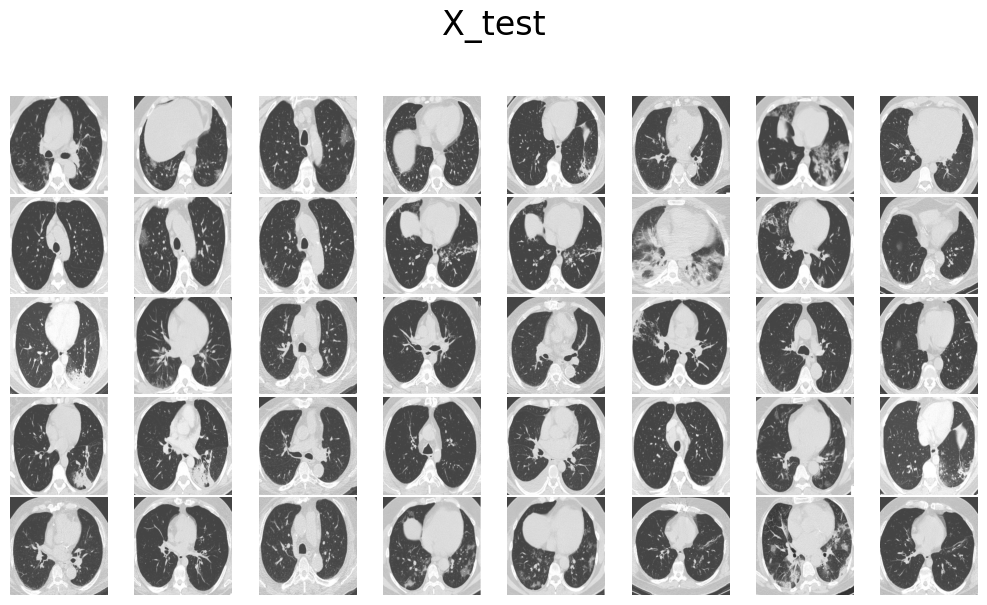

74836368/74836368 [==============================] - 2s 0us/step
Epoch 1/50
19/19 [==============================] - 278s 13s/step - loss: 2.3224 - accuracy: 0.6917 - val_loss: 0.3992 - val_accuracy: 0.8875
Epoch 2/50
19/19 [==============================] - 258s 13s/step - loss: 0.6715 - accuracy: 0.8685 - val_loss: 0.7796 - val_accuracy: 0.8438
Epoch 3/50
19/19 [==============================] - 258s 13s/step - loss: 0.4173 - accuracy: 0.9124 - val_loss: 0.1296 - val_accuracy: 0.9500
Epoch 4/50
19/19 [==============================] - 261s 13s/step - loss: 0.5052 - accuracy: 0.8998 - val_loss: 0.1670 - val_accuracy: 0.9187
Epoch 5/50
19/19 [==============================] - 221s 11s/step - loss: 0.3181 - accuracy: 0.9233 - val_loss: 0.0458 - val_accuracy: 0.9812
Epoch 6/50
19/19 [==============================] - 220s 11s/step - loss: 0.2293 - accuracy: 0.9531 - val_loss: 0.3460 - val_accuracy: 0.9125
Epoch 7/50
19/19 [==============================] - 263s 13s/step - loss: 0.2230 - 

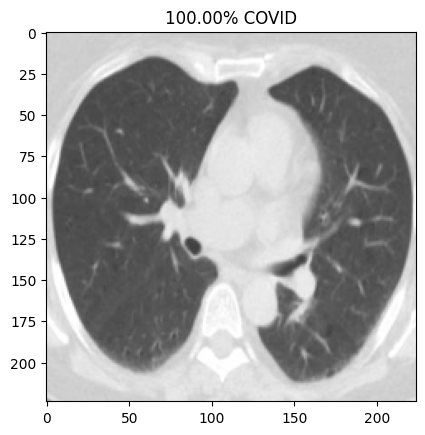

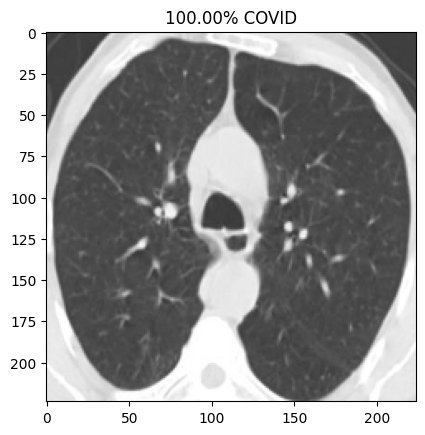

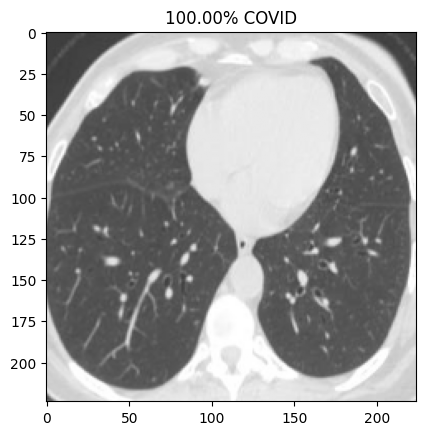

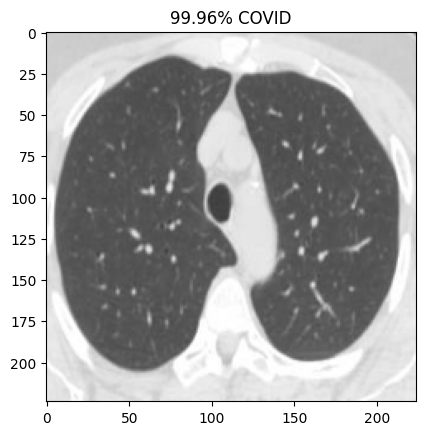

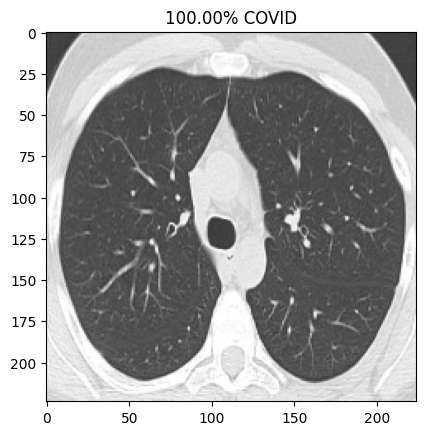

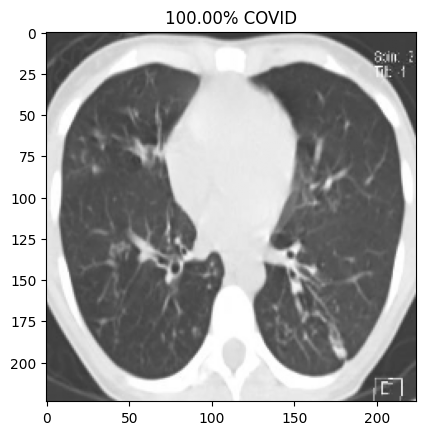

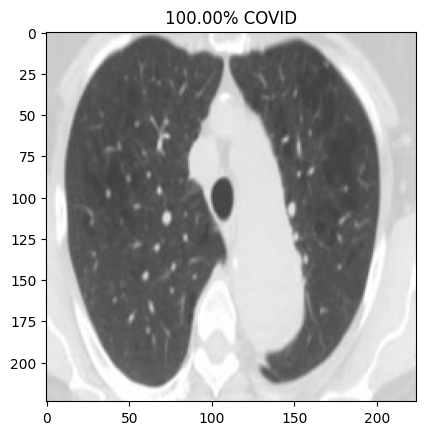

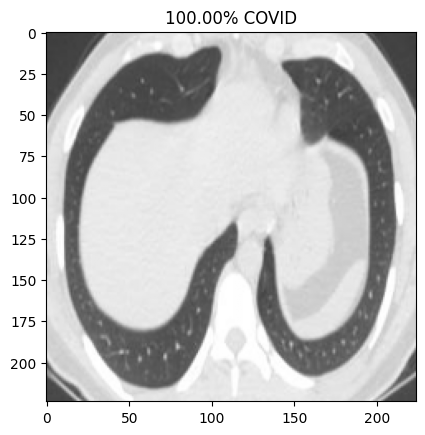

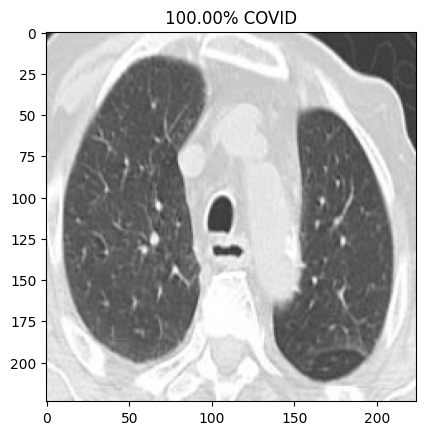

Confusion Matrix without Normalization


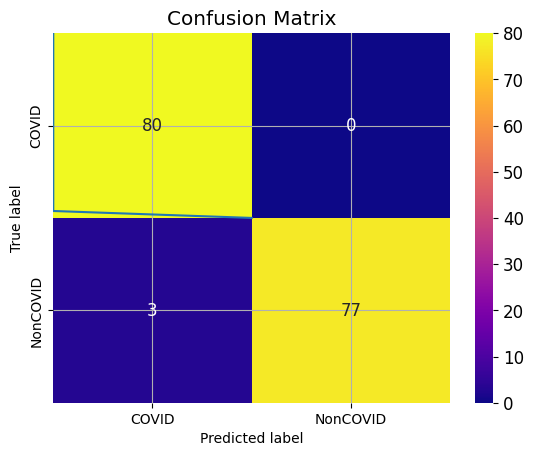

Confusion Matrix with Normalized Values


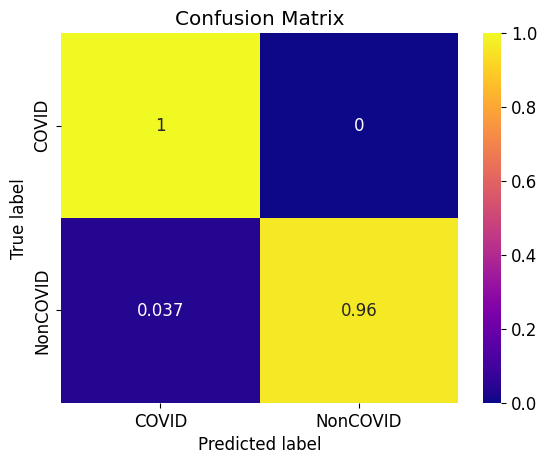

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        80
           1       1.00      0.96      0.98        80

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160



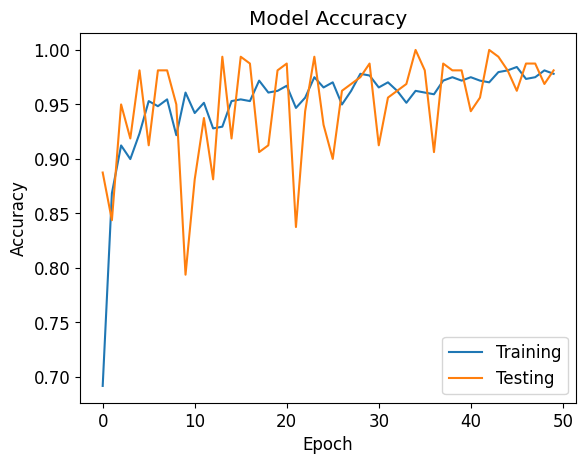

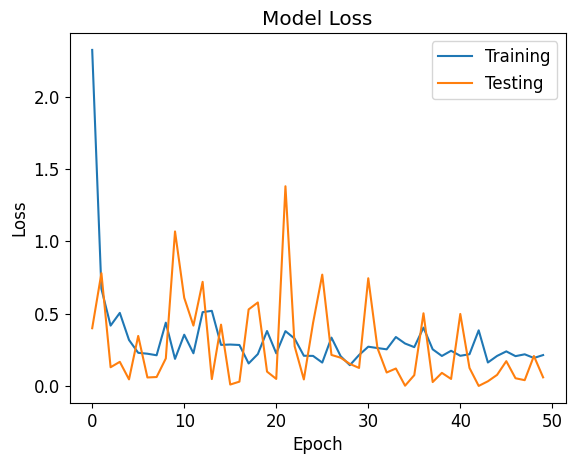

In [2]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#define size to which images are to be resized which is 224
IMAGE_SIZE = [224, 224]

#Define the epochs that will reach the highest accuracy
epochs = 50
batch_size = 32

#define paths whet the file are to be fetched. Since we are using google colab. Drag the files to the specific location from kaggle download
covid_path = '/home/CT_COVID'
noncovid_path = '/home/CT_NonCOVID'

# Use glob to grab images from the specified path
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

# Visualize the file contents
print("First 5 None Covid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))


# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') #append class label
for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

# look at a random image
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')

# Convert to array and Normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255


# Split into training and testing sets for both types of images
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

# Make labels into categories - either 0 or 1, for our model
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

plot_images(covid_x_train, 'X_train')
plot_images(covid_x_test, 'X_test')


# Building Model

densenetModel = DenseNet201(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = densenetModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=densenetModel.input, outputs=outputs)

for layer in densenetModel.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

#Image Augmentation
#To train on images at different positions, angles, flips, etc
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


#Training the model
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)


#Making Predicions
y_pred = model.predict(X_test, batch_size=batch_size)

#Visulaizing First 10 predictions
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

  # Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

#Plot Confusion Matrix
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

#Accuracy and Loss Plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('densenetModel.png')
plt.show()

#Loss Plots

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('densenetModel.png')
plt.show()